In [1]:
#

In [31]:
def read_letter(f):
    data = []
    while True:
        line = f.readline().strip()
        if len(line) < 2 or line == '##':
            next_c = line
            break
        if len(line) > 8:
            raise TypeError("{0}: длина строки больше 8".format(c))
        row = tuple([(1 if x == '*' else 0) for x in line])
        data.append(row)
    return data, next_c

def flatten_data(data):
    t = ()
    for d in data:
        t = t + d
    return t

def read_letters():
    f = open('data/braille.txt', 'rt', encoding='utf-8')
    d = {}
    line = f.readline().strip()
    c = line[0]
    while True:
        if c == '##':
            break
#         line = f.readline().strip()
        data, next_c = read_letter(f)
        lst = d.setdefault(c, [])
        data = flatten_data(data)
        lst.append(data)
        c = next_c
    f.close()
    return d

In [32]:
data = read_letters()
print(data)

{'А': [(1, 0, 0, 0, 0, 0)], 'Б': [(1, 0, 1, 0, 0, 0)], 'В': [(0, 1, 1, 1, 0, 1)], 'Г': [(1, 1, 1, 1, 0, 0)], 'Д': [(1, 1, 0, 1, 0, 0)], 'Е': [(1, 0, 0, 1, 0, 0)], 'Ё': [(1, 0, 0, 0, 0, 1)], 'Ж': [(0, 1, 1, 1, 0, 0)], 'З': [(1, 0, 0, 1, 1, 1)], 'И': [(0, 1, 1, 0, 0, 0)], 'Й': [(1, 1, 1, 0, 1, 1)], 'К': [(1, 0, 0, 0, 1, 0)], 'Л': [(1, 0, 1, 0, 1, 0)], 'М': [(1, 1, 0, 0, 1, 0)], 'Н': [(1, 1, 0, 1, 1, 0)], 'О': [(1, 0, 0, 1, 1, 0)], 'П': [(1, 1, 1, 0, 1, 0)], 'Р': [(1, 0, 1, 1, 1, 0)], 'С': [(0, 1, 1, 0, 1, 0)], 'Т': [(0, 1, 1, 1, 1, 0)], 'У': [(1, 0, 0, 0, 1, 1)], 'Ф': [(1, 1, 1, 0, 0, 0)], 'х': [(1, 0, 1, 1, 0, 0)], 'Ц': [(1, 1, 0, 0, 0, 0)], 'Ч': [(1, 1, 1, 1, 1, 0)], 'Ш': [(1, 0, 0, 1, 0, 1)], 'Щ': [(1, 1, 0, 0, 1, 1)], 'Ъ': [(1, 0, 1, 1, 1, 1)], 'Ы': [(0, 1, 1, 0, 1, 1)], 'Ь': [(0, 1, 1, 1, 1, 1)], 'Э': [(0, 1, 1, 0, 0, 1)], 'Ю': [(1, 0, 1, 1, 0, 1)], 'Я': [(1, 1, 1, 0, 0, 1)]}


In [33]:
X = []
Y = {}
C = tuple(data.keys())
for _, lst in data.items():
    X.extend(lst)

for c in C:
    Yc = []
    for cc, lst in data.items():
        m = len(lst)
        for i in range(m):
            if cc == c:
                Yc.append(1)
            else:
                Yc.append(0)
    Y[c] = Yc


In [34]:
X[0]

(1, 0, 0, 0, 0, 0)

In [36]:
for k, x in enumerate(X):
#     print(X.count(x))
    if X.count(x) > 1:
        print(k)

In [37]:
import pandas as pd
import numpy as np

from spn import LogicalArithmeticSPN

In [38]:
spn = LogicalArithmeticSPN()
spn.fit(X, Y['А'])

In [43]:
spn_dict = {}
for c in Y:
    spn = LogicalArithmeticSPN()
    spn.fit(X, Y[c])
#     print(spn.evaluate_all(X))
#     print(Y[c])
    print(c, spn.mindices, spn.weights, spn.evaluate_all(X) == Y[c])
    spn_dict[c] = spn

А [(2,), (5,), (4,), (3,), (0, 1)] [-1, -1, -1, -1, -1] True
Б [(0,), (2,), (0, 2), (0, 2, 4), (0, 2, 3), (0, 1, 2)] [-1, -1, 2, -1, -1, -1] True
В [(0,), (2,), (2, 3, 5), (2, 3, 4, 5)] [-1, -1, 1, -1] True
Г [(0,), (2,), (0, 1, 2, 3), (0, 1, 2, 3, 4)] [-1, -1, 2, -1] True
Д [(0,), (2,), (0, 1, 3), (0, 1, 3, 4)] [-1, -1, 1, -1] True
Е [(0,), (2,), (3,), (2, 3), (3, 5), (3, 4), (0, 1, 3)] [-1, -1, 1, -1, -1, -1, -1] True
Ё [(0,), (2,), (5,), (2, 5), (4, 5), (3, 5)] [-1, -1, 1, -1, -1, -1] True
Ж [(0,), (2,), (2, 3), (2, 3, 5), (2, 3, 4)] [-1, -1, 1, -1, -1] True
З [(0,), (2,), (3, 4, 5), (2, 3, 4, 5)] [-1, -1, 1, -1] True
И [(0,), (2, 5), (2, 4), (2, 3)] [-1, -1, -1, -1] True
Й [(0,), (2,), (0, 1, 2, 4, 5)] [-1, -1, 2] True
К [(0,), (2,), (4,), (2, 4), (4, 5), (3, 4), (0, 1, 4)] [-1, -1, 1, -1, -1, -1, -1] True
Л [(0,), (2,), (0, 2, 4), (0, 2, 3, 4), (0, 1, 2, 4)] [-1, -1, 2, -1, -1] True
М [(0,), (2,), (0, 1, 4), (0, 1, 5), (0, 1, 3, 4)] [-1, -1, 1, -1, -1] True
Н [(0,), (2,), (0, 1, 3

In [44]:
from IPython import display
text = r'\begin{eqnarray}'
for c in spn_dict:
    text += r"\mathrm{spn}_%s &=& %s\\" % (c, spn_dict[c].latex()[1:-1])
text += r'\end{eqnarray}'
display.Latex(text)


<IPython.core.display.Latex object>

In [50]:
import networkx as nx
import matplotlib.pyplot as plt

In [51]:
def plot_spn_digraph(spn):
    g = nx.DiGraph()

    x_list = []
    P_list = []

    edge_labels ={}
    
    m = len(spn.mindices)
    for i in range(m):
        P = 'P'+str(i+1)
        if P not in P_list:
            P_list.append(P)

        mi = spn.mindices[i]
        for t in mi:
            x = 'x'+str(t+1)
            if x not in x_list:
                x_list.append(x)
            key = (x, P)
            g.add_edge(*key)

        S = 'S'
        g.add_edge(P, S)
        key = (P, S)
        g.add_edge(*key)
        edge_labels[key] = spn.weights[i]
        H = 'H'
        g.add_edge(S, H)
        y = 'y'
        g.add_edge(H, y)

    node_colors = []
    for node in g.nodes:
        c = node[0]
        if c == 'x':
            node_colors.append('gray')
        elif c == 'P':  
            node_colors.append('g')
        elif c == 'S':  
            node_colors.append('b')
        elif c == 'H':  
            node_colors.append('m')
        elif c == 'y':  
            node_colors.append('gray')
            
    ax = plt.gca()
    pos = nx.drawing.layout.shell_layout(g, nlist=[x_list, P_list, ['S'], ['H'], ['y']], center=(0,0))
    nx.draw_networkx(g, pos=pos, with_label=True, arrows=True, ax=ax, 
                     node_color=node_colors)
    nx.draw_networkx_edge_labels(g, pos=pos, ax=ax, edge_labels=edge_labels)
#     ax.legend()


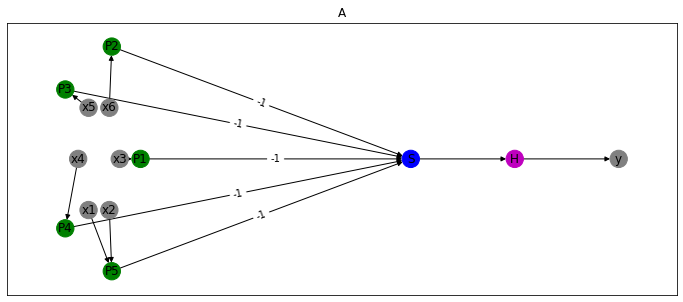

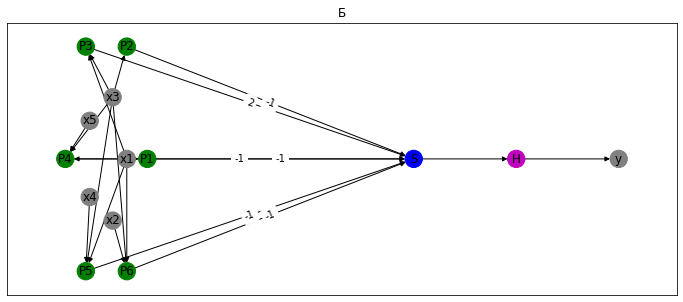

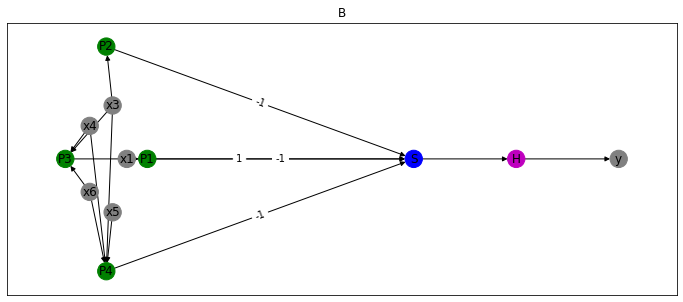

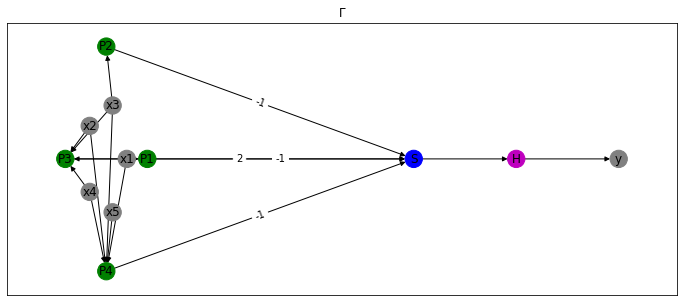

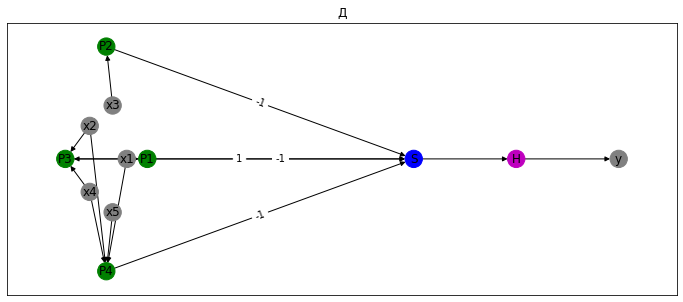

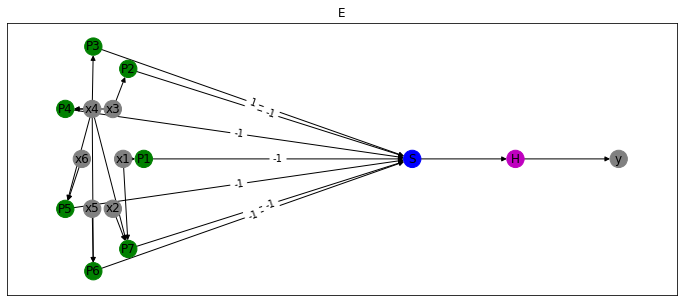

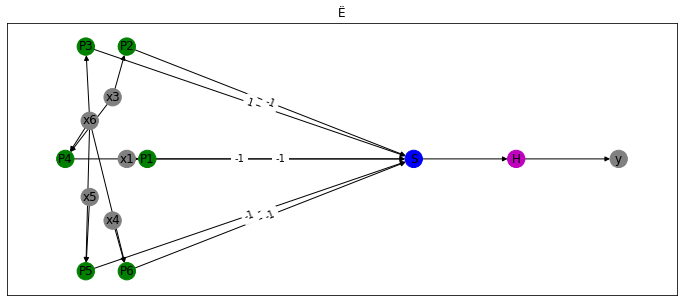

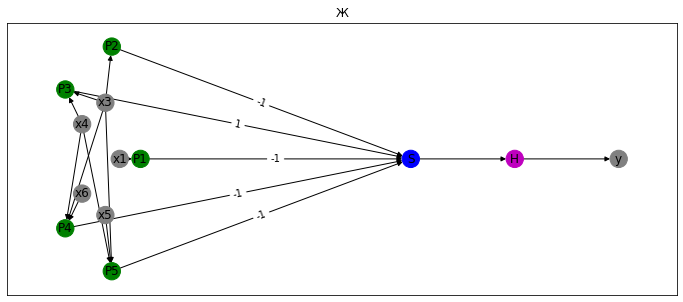

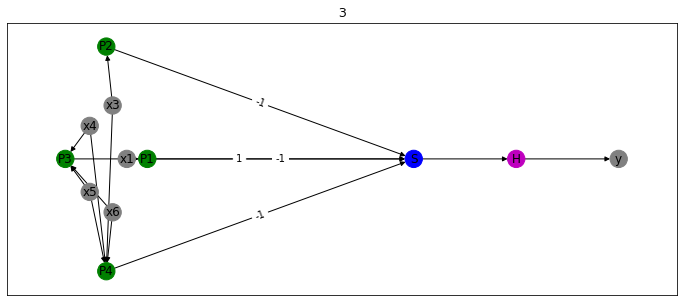

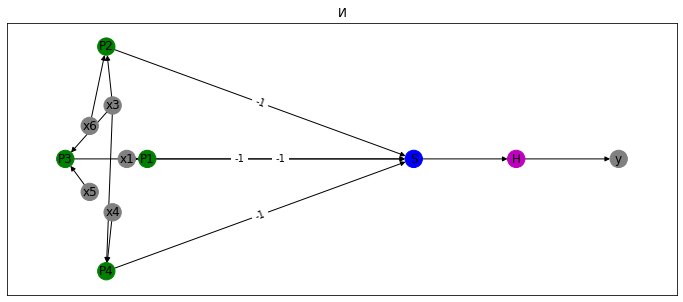

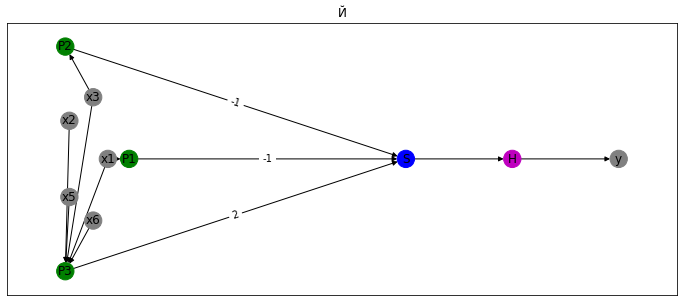

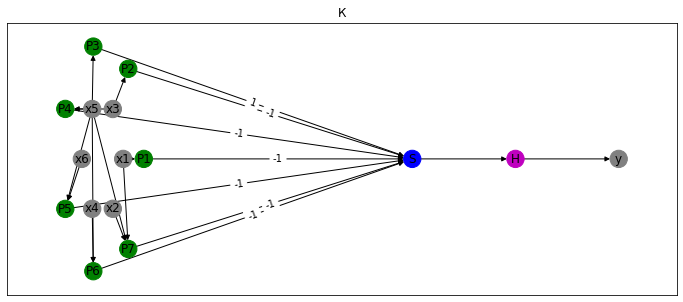

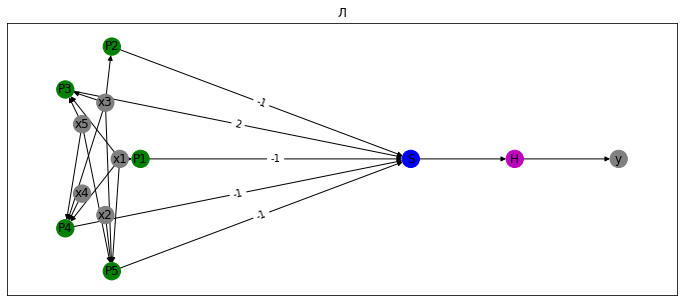

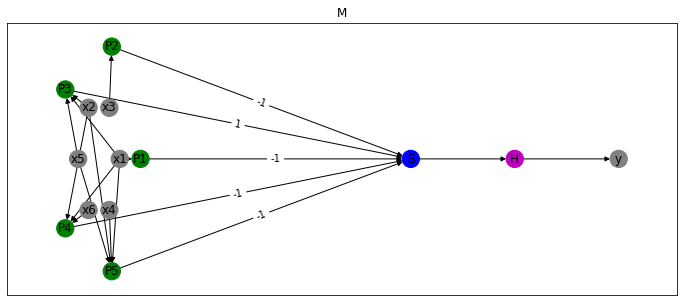

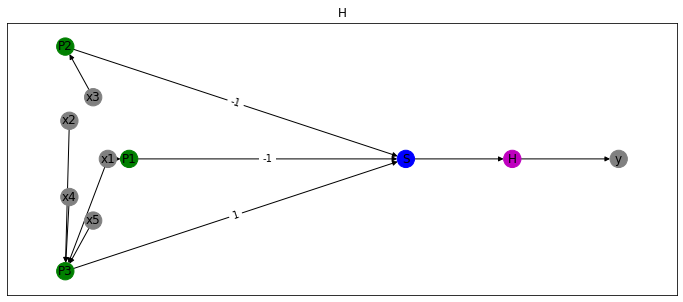

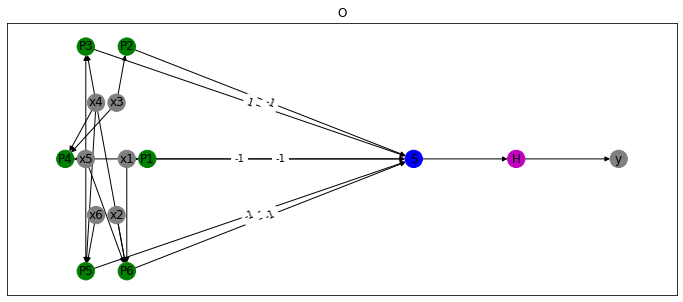

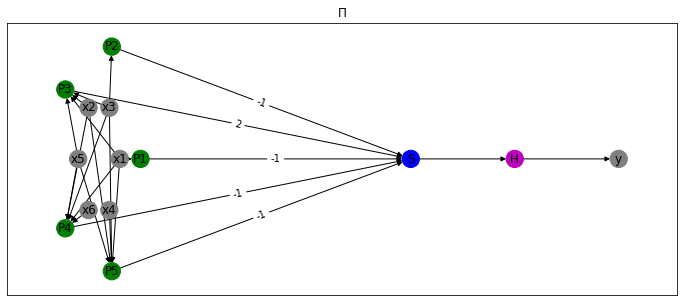

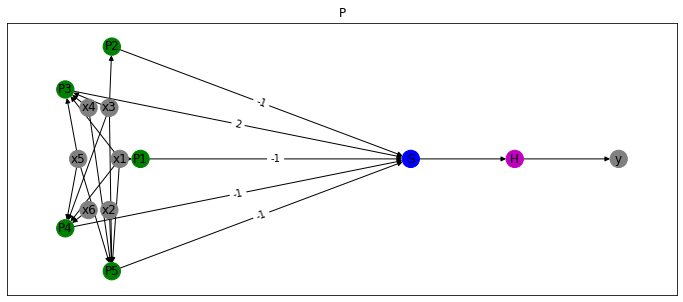

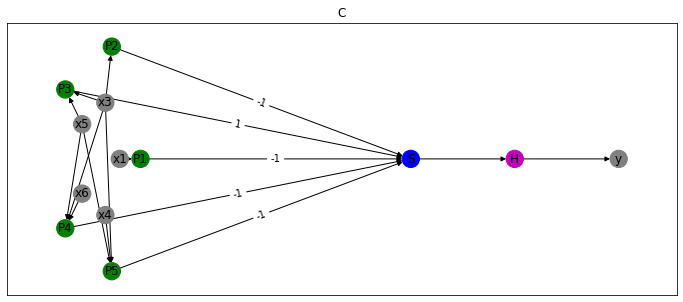

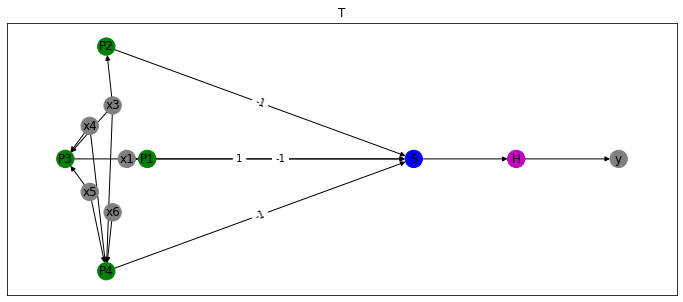

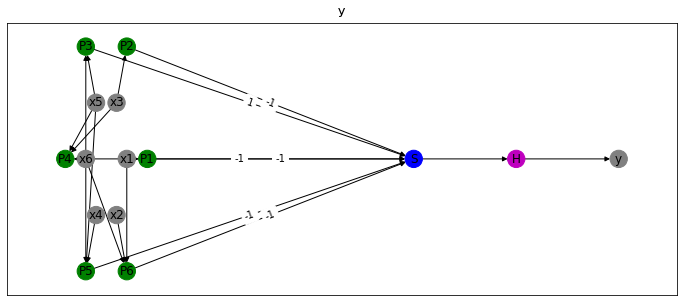

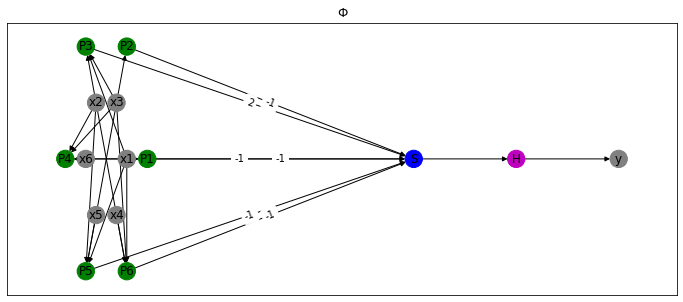

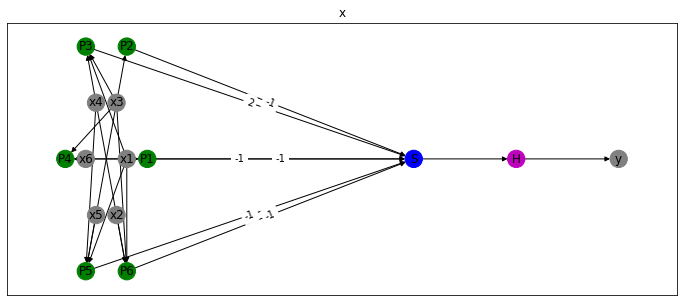

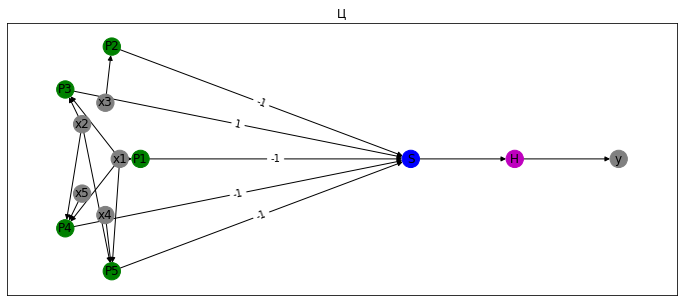

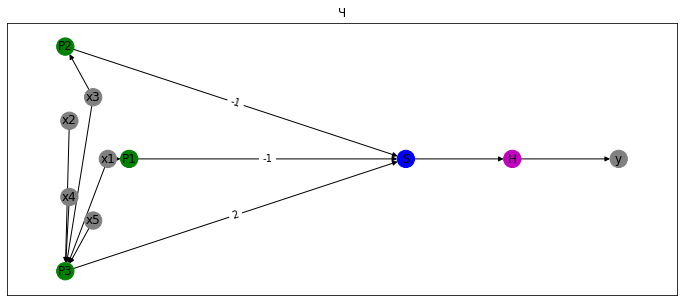

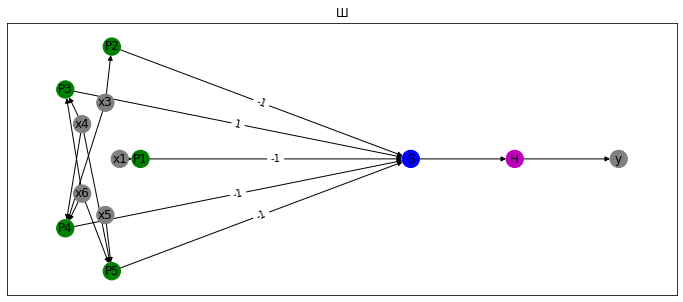

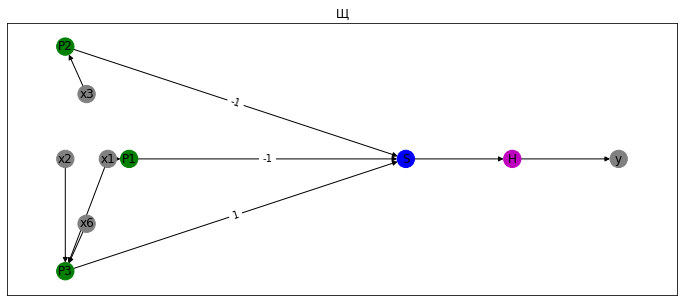

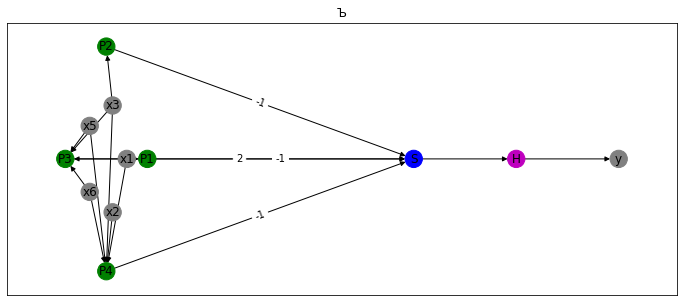

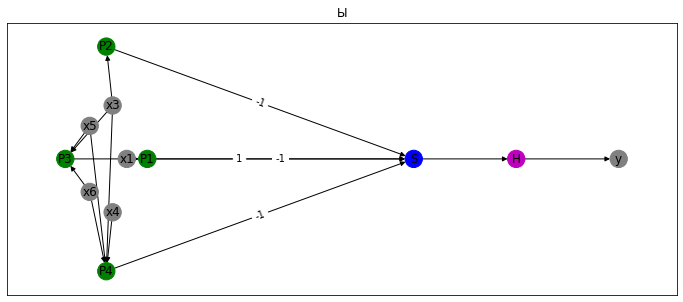

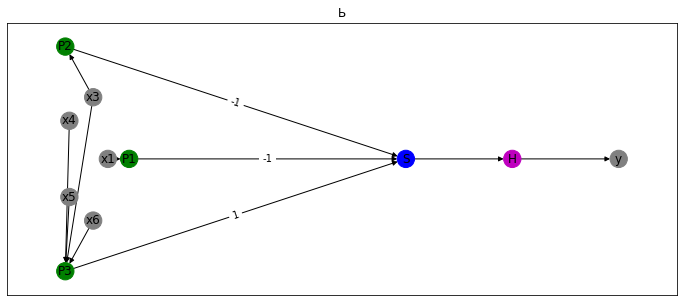

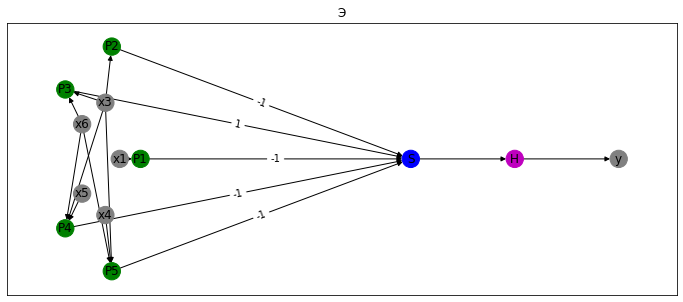

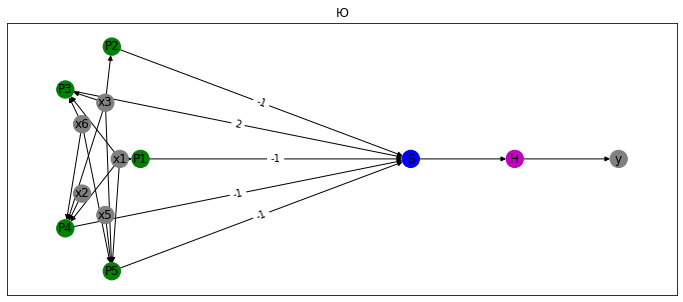

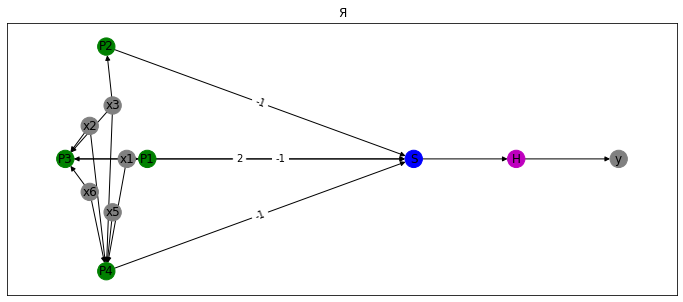

In [56]:
for c, spn in spn_dict.items():
    plt.figure(figsize=(12,5))
    plot_spn_digraph(spn)
    plt.title(c)
    plt.savefig('fig/braile_spn_%s.jpg' % c)
    plt.show()

In [64]:
g = nx.DiGraph()
mindices = []
for c,spn in spn_dict.items():
    print(c, spn.mindices)
    for mi in spn.mindices:
        if mi not in mindices:
            mindices.append(mi)
#print(mindices)
x_list = []
P_list = []
S_list = []
H_list = []
y_list = []
for i, mi in enumerate(mindices):
    for t in mi:
        x = 'x'+str(t+1)
        P = 'P'+str(i+1)
        if x not in x_list:
            x_list.append(x)
        if P not in P_list:
            P_list.append(P)
        key = (x, P)
        g.add_edge(*key)

edge_labels = {}
for c, spn in spn_dict.items():
    S = 'S'+str(c)
    if S not in S_list:
        S_list.append(S)
    for mi, w in zip(spn.mindices, spn.weights):
        j = mindices.index(mi) + 1
        P = 'P'+str(j)
        if P not in P_list:
            P_list.append(P)
        key = (P, S)
        g.add_edge(*key)
        edge_labels[key] = w
    H = 'H'+str(c)
    if H not in H_list:
        H_list.append(H)
    y = 'y'+str(c)
    if y not in y_list:
        y_list.append(y)
    g.add_edge(S, H)        
    g.add_edge(H, y)
node_colors = []
for node in g.nodes:
    c = node[0]
    if c == 'x':
        node_colors.append('gray')
    elif c == 'P':  
        node_colors.append('g')
    elif c == 'S':  
        node_colors.append('b')
    elif c == 'H':  
        node_colors.append('m')
    elif c == 'y':  
        node_colors.append('gray')
        

А [(2,), (5,), (4,), (3,), (0, 1)]
Б [(0,), (2,), (0, 2), (0, 2, 4), (0, 2, 3), (0, 1, 2)]
В [(0,), (2,), (2, 3, 5), (2, 3, 4, 5)]
Г [(0,), (2,), (0, 1, 2, 3), (0, 1, 2, 3, 4)]
Д [(0,), (2,), (0, 1, 3), (0, 1, 3, 4)]
Е [(0,), (2,), (3,), (2, 3), (3, 5), (3, 4), (0, 1, 3)]
Ё [(0,), (2,), (5,), (2, 5), (4, 5), (3, 5)]
Ж [(0,), (2,), (2, 3), (2, 3, 5), (2, 3, 4)]
З [(0,), (2,), (3, 4, 5), (2, 3, 4, 5)]
И [(0,), (2, 5), (2, 4), (2, 3)]
Й [(0,), (2,), (0, 1, 2, 4, 5)]
К [(0,), (2,), (4,), (2, 4), (4, 5), (3, 4), (0, 1, 4)]
Л [(0,), (2,), (0, 2, 4), (0, 2, 3, 4), (0, 1, 2, 4)]
М [(0,), (2,), (0, 1, 4), (0, 1, 5), (0, 1, 3, 4)]
Н [(0,), (2,), (0, 1, 3, 4)]
О [(0,), (2,), (3, 4), (2, 3, 4), (3, 4, 5), (0, 1, 3, 4)]
П [(0,), (2,), (0, 1, 2, 4), (0, 1, 2, 4, 5), (0, 1, 2, 3, 4)]
Р [(0,), (2,), (0, 2, 3, 4), (0, 2, 4, 5), (0, 1, 2, 3, 4)]
С [(0,), (2,), (2, 4), (2, 4, 5), (2, 3, 4)]
Т [(0,), (2,), (2, 3, 4), (2, 3, 4, 5)]
У [(0,), (2,), (4, 5), (2, 4, 5), (3, 4, 5), (0, 1, 5)]
Ф [(0,), (2,), (0, 

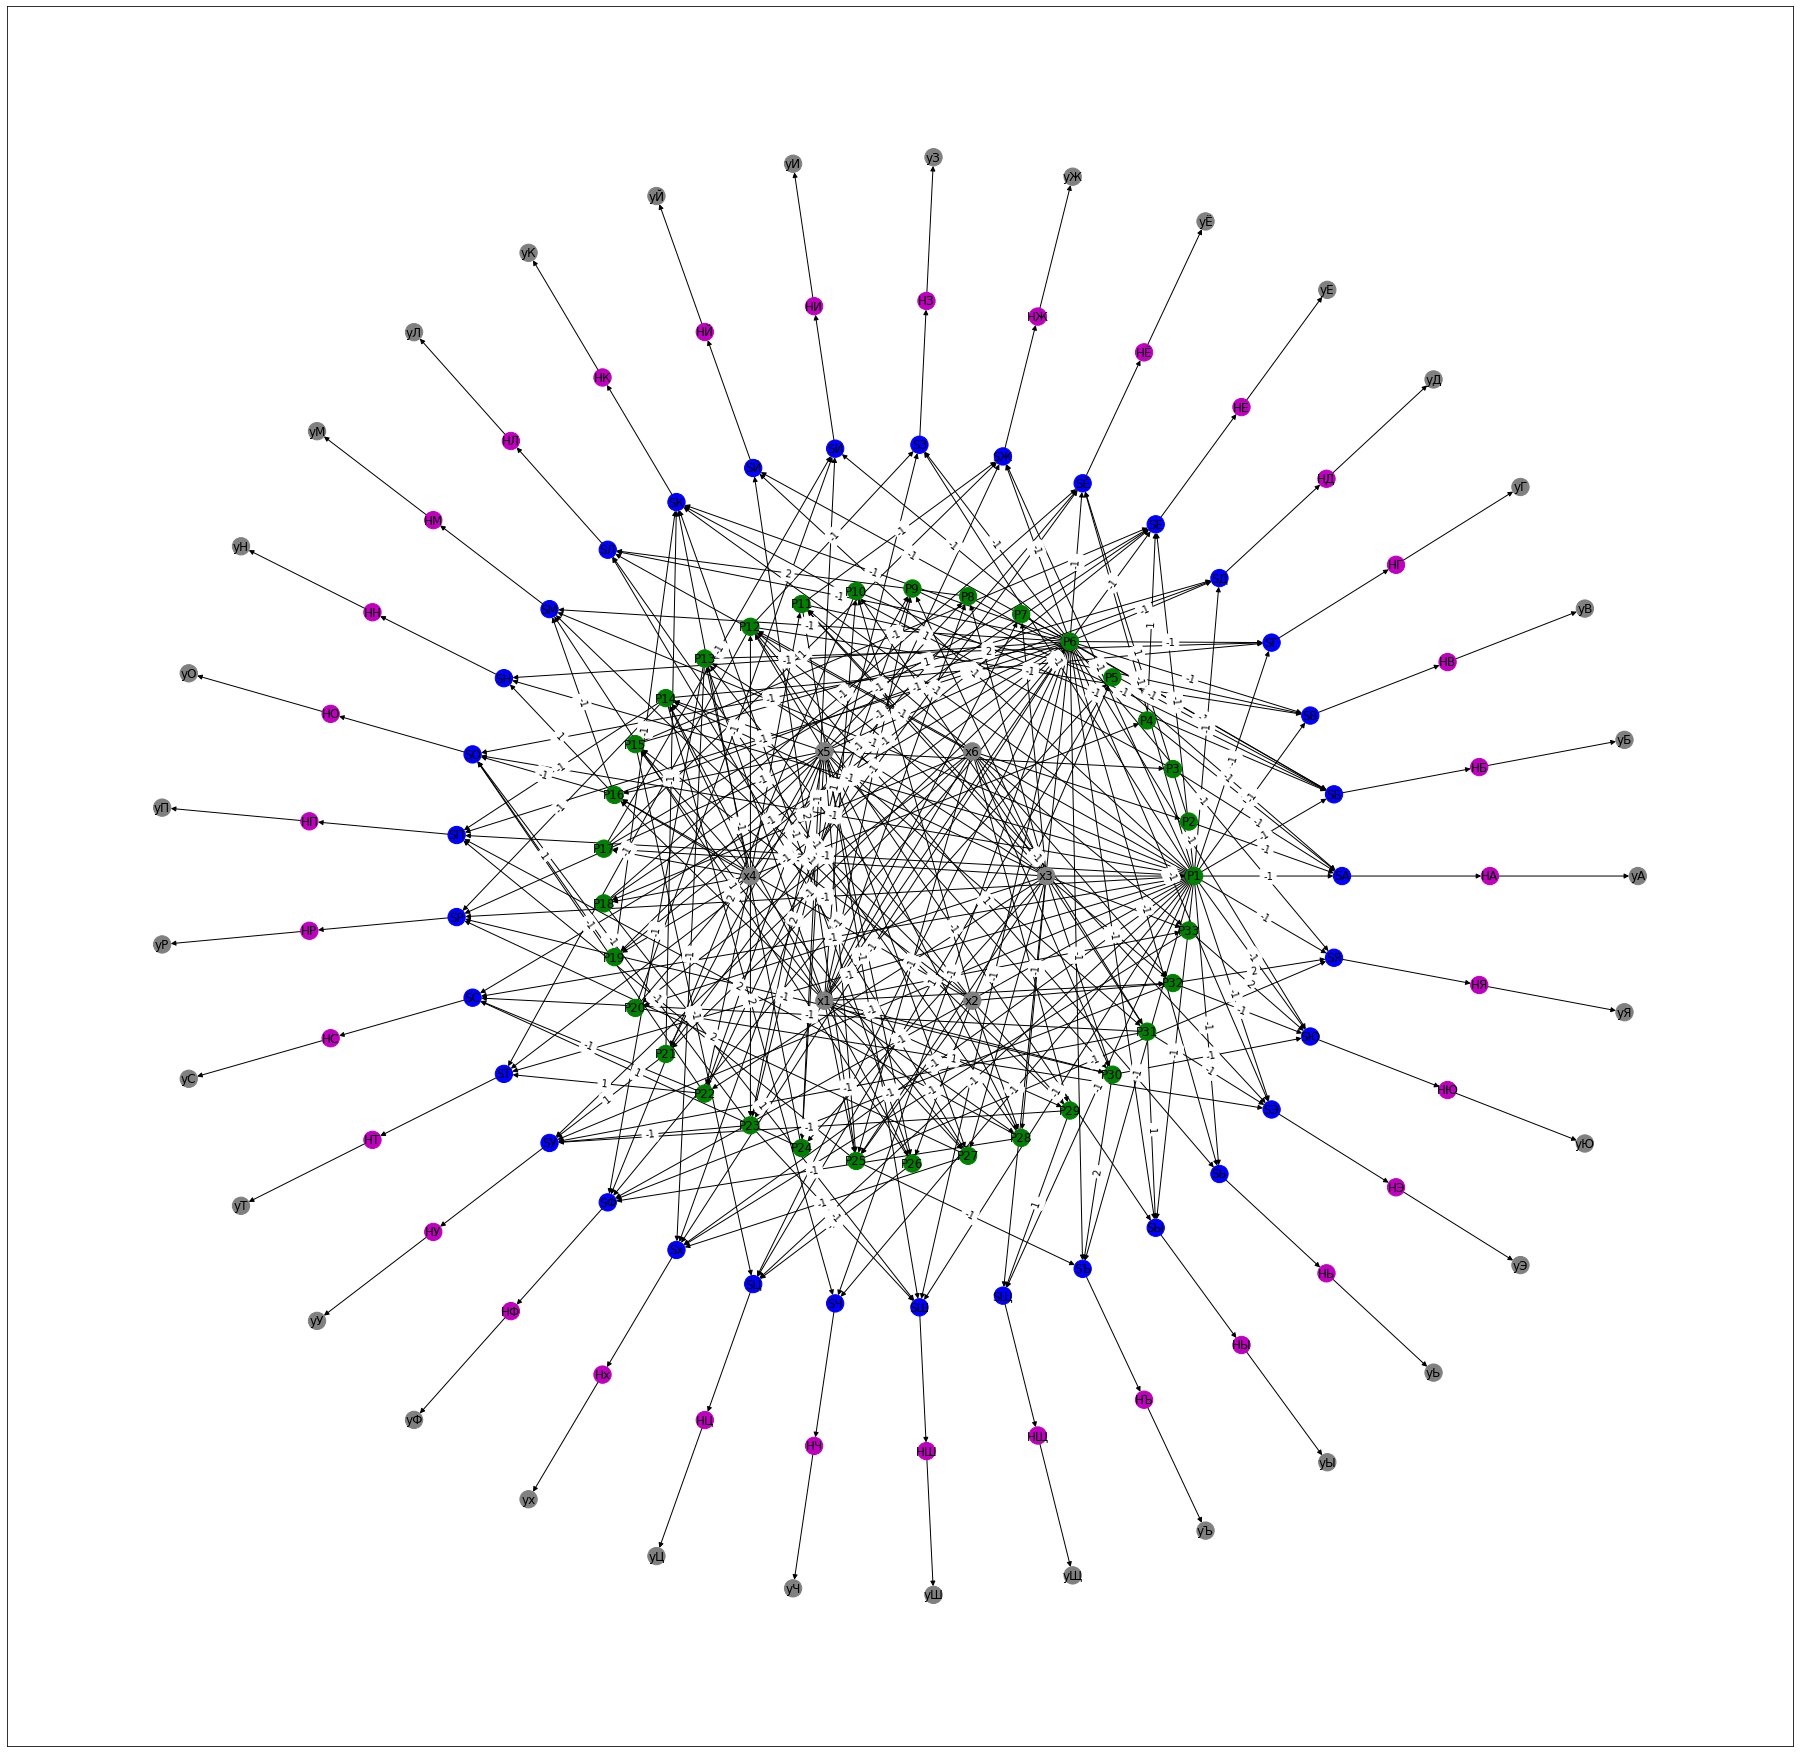

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(32,32))
ax = plt.gca()
pos = nx.drawing.layout.shell_layout(g, scale=1., nlist=[x_list, P_list, S_list, H_list, y_list])
nx.draw_networkx(g, pos=pos, with_label=True, arrows=True, ax=ax, 
                 node_color=node_colors)
nx.draw_networkx_edge_labels(g, pos=pos, with_label=True, arrows=True, ax=ax, 
                             node_color=node_colors, edge_labels = edge_labels)
plt.savefig('spn_braille.eps')
plt.show()